In [2]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict
import matplotlib.pyplot as plt
import os
os.chdir(os.getcwd() + '/..')

from data import read_texts

plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 3})
plt.rcParams.update({'lines.markersize': 10})


In [3]:
DNAMES = ["brown", "reuters", "gutenberg"]
data = {}
for dname in DNAMES:
  data[dname] = read_texts("data/corpora.tar.gz", dname)

brown  read. train: 39802 dev: 8437 test: 8533
reuters  read. train: 38183 dev: 8083 test: 8199
gutenberg  read. train: 68767 dev: 14667 test: 14861


In [44]:
token_counts = {}
total_counts = {}

for dname in DNAMES:
  token_counts[dname] = defaultdict(lambda: 0)
  total_counts[dname] = 0
  for sentence in data[dname].train:
    for token in sentence:
      token_counts[dname][token] += 1
      total_counts[dname] += 1

In [61]:
counts = sorted(list(token_counts["gutenberg"].items()), key=lambda wc: -wc[1])
counts[:200]

[('the', 87971),
 ('and', 55265),
 ('of', 48920),
 ('to', 32519),
 ('in', 22575),
 ('that', 19024),
 ('he', 15604),
 ('his', 14432),
 ('it', 13847),
 ('was', 12981),
 ('for', 11897),
 ('not', 11846),
 ('with', 11736),
 ('And', 11659),
 ('be', 11194),
 ('is', 11155),
 ('you', 10211),
 ('as', 9386),
 ('him', 9088),
 ('all', 9067),
 ('they', 8195),
 ('shall', 8077),
 ('her', 7773),
 ('them', 7149),
 ('had', 7103),
 ('have', 6929),
 ('my', 6647),
 ('said', 6560),
 ('me', 6537),
 ('but', 6471),
 ('unto', 6234),
 ('at', 6022),
 ('from', 6011),
 ('which', 5870),
 ('on', 5731),
 ('by', 5528),
 ('this', 5365),
 ('The', 5295),
 ('their', 5210),
 ('she', 5208),
 ('will', 5103),
 ('were', 4734),
 ('are', 4688),
 ('LORD', 4668),
 ('so', 4457),
 ('thou', 4228),
 ('or', 4052),
 ('one', 4021),
 ('out', 3986),
 ('man', 3791),
 ('when', 3698),
 ('thy', 3693),
 ('there', 3685),
 ('up', 3516),
 ('your', 3401),
 ('no', 3397),
 ('God', 3386),
 ('thee', 3289),
 ('an', 3273),
 ('But', 3270),
 ('upon', 3128),


In [60]:
counts = sorted(list(token_counts["brown"].items()), key=lambda wc: -wc[1])
counts[:200]

[('the', 44011),
 ('of', 25310),
 ('and', 19612),
 ('to', 18037),
 ('in', 13785),
 ('that', 7303),
 ('is', 7061),
 ('was', 6908),
 ('for', 6277),
 ('The', 5123),
 ('with', 4963),
 ('it', 4929),
 ('he', 4692),
 ('as', 4691),
 ('his', 4509),
 ('on', 4497),
 ('be', 4482),
 ('had', 3616),
 ('by', 3607),
 ('at', 3465),
 ('not', 3131),
 ('are', 3010),
 ('or', 2947),
 ('from', 2925),
 ('this', 2755),
 ('have', 2743),
 ('an', 2511),
 ('which', 2475),
 ('were', 2315),
 ('He', 2166),
 ('one', 2137),
 ('but', 2117),
 ('you', 2067),
 ('they', 2039),
 ('her', 2031),
 ('all', 1975),
 ('would', 1894),
 ('their', 1824),
 ('him', 1777),
 ('been', 1749),
 ('has', 1711),
 ('will', 1562),
 ('It', 1541),
 ('who', 1535),
 ('more', 1510),
 ('out', 1505),
 ('she', 1459),
 ('we', 1442),
 ('there', 1358),
 ('said', 1346),
 ('up', 1341),
 ('can', 1320),
 ('than', 1297),
 ('no', 1272),
 ('them', 1256),
 ('its', 1256),
 ('so', 1255),
 ('In', 1245),
 ('into', 1238),
 ('about', 1232),
 ('when', 1186),
 ('other', 117

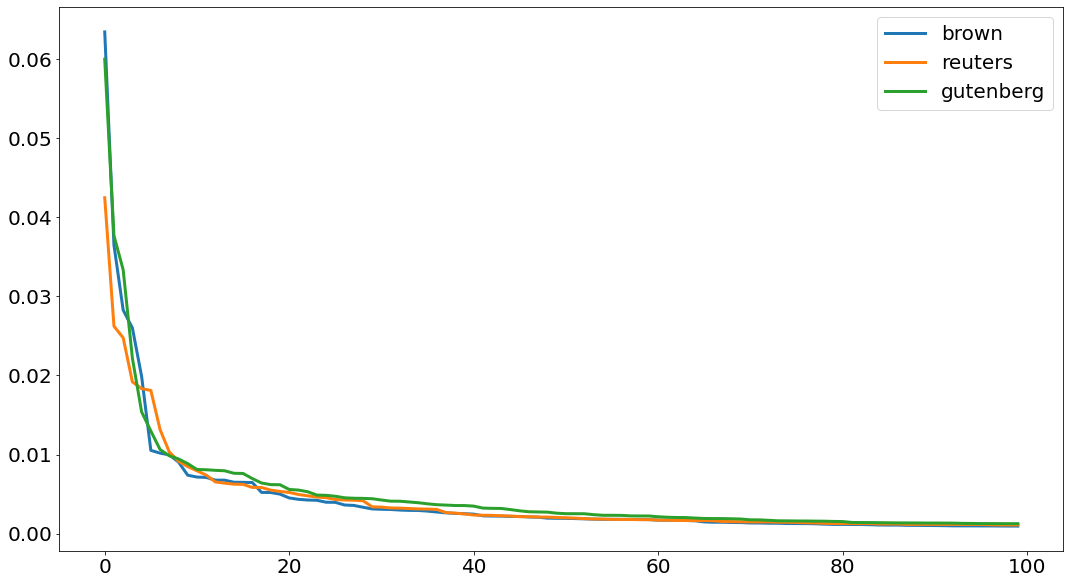

In [35]:
plt.figure(figsize=(18,10))
for dname in DNAMES:
  counts = sorted(list(token_counts[dname].values()), reverse=True)
  counts = np.array(counts)
  plt.plot(counts[:100] / total_counts[dname], label=dname)
plt.legend()

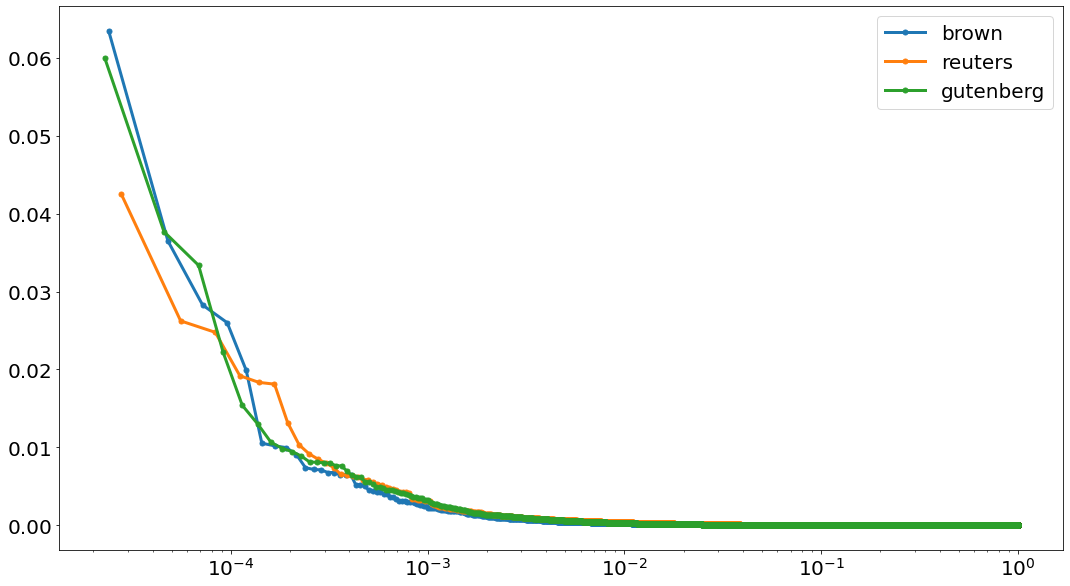

In [74]:
plt.figure(figsize=(18,10))
for dname in DNAMES:
  counts = sorted(list(token_counts[dname].values()), reverse=True)
  counts = np.array(counts)
  plt.plot(np.arange(1, len(counts) + 1) / len(counts), counts / total_counts[dname], label=dname, marker='.')
  plt.xscale('log')
plt.legend()

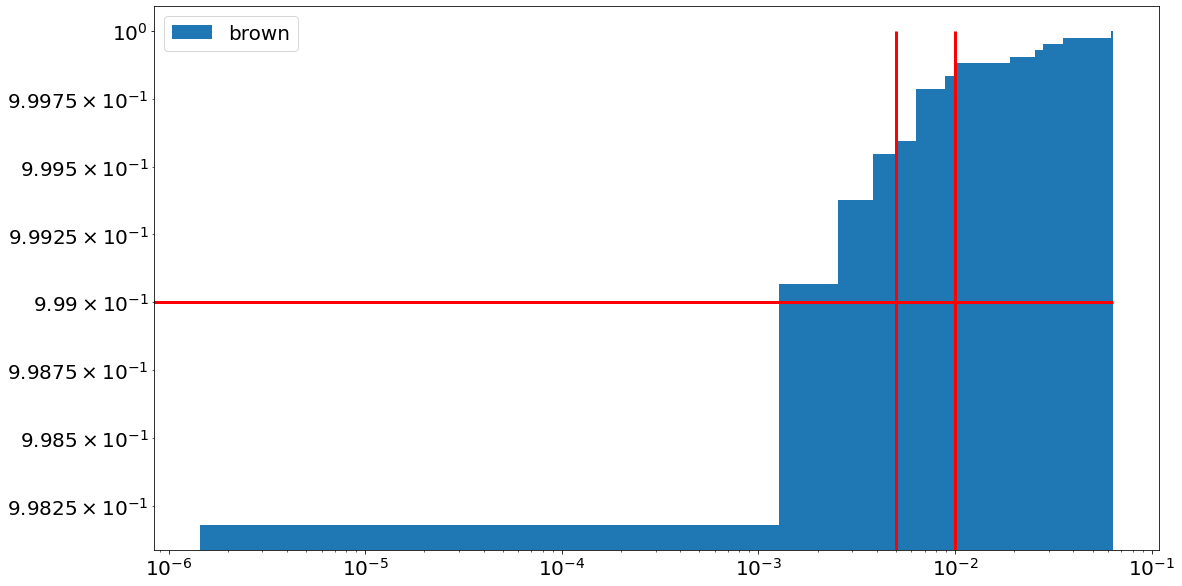

In [68]:
plt.figure(figsize=(18,10))
for dname in DNAMES[:1]:
  counts = sorted(list(token_counts[dname].values()), reverse=True)
  counts = np.array(counts)
  plt.hist(counts / total_counts[dname], bins=50, label=dname, density=True, cumulative=True)
  plt.yscale('log')
  plt.xscale('log')
plt.vlines(.01, 0, 1, color='red')
plt.vlines(.005, 0, 1, color='red')
plt.hlines(.999, 0, max(counts) / total_counts[dname], color='red')
plt.legend()

In [21]:
DICSIZE = 1000
for dname in DNAMES:
  counts = list(token_counts[dname].values())[DICSIZE:]
  print(f'{dname}: {sum(counts) / total_counts[dname]}')

brown: 0.47450780832166856
reuters: 0.4473155370479712
gutenberg: 0.3667830451148328


# UNKs

In [40]:
EOS = 'END_OF_SENTENCE'

def vocabulary(corpus):
  vocabulary = set()
  for s in corpus:
    for w in s:
      vocabulary.add(w)
  return vocabulary
  
def vocabulary_unk_ratio(corpus, unk_ratio):
  vocabulary = {}
  for s in corpus:
    for word in s:
      vocabulary[word] = vocabulary.get(word, 0) + 1
    vocabulary[EOS] = vocabulary.get(EOS, 0) + 1

  # Sort by least frequent words.
  word_counts = sorted(vocabulary.items(), key=lambda wc: wc[1])
  print(word_counts[:100])
  sum_counts = sum(c for _, c in word_counts)

  # Get UNKs as the set of least frequent words, which collectively comprise
  # of, roughly, `unk_ratio` percent.
  unks = set()
  unk_count = 0
  for w, c in word_counts:
    if w == EOS:
      continue
    if unk_count / sum_counts > unk_ratio:
      break
    unks.add(w)
    unk_count += c
  
  print(unks)

  for word in unks:
    vocabulary.pop(word)
  return vocabulary
  
def vocabulary_voc_ratio(corpus, voc_ratio):
  vocabulary = {}
  for s in corpus:
    for word in s:
      vocabulary[word] = vocabulary.get(word, 0) + 1
    vocabulary[EOS] = vocabulary.get(EOS, 0) + 1

  # Sort by least frequent words.
  word_counts = sorted(vocabulary.items(), key=lambda wc: -wc[1])
  print(word_counts[:100])
  
  for i in range(len(word_counts)):
    if word_counts[i][0] == EOS:
      break
  print(i)
  print(word_counts.index((EOS, len(corpus))))
  
  vocabulary = set([w for w, _ in word_counts][int(len(vocabulary) * voc_ratio):])
  return vocabulary
  

In [25]:
V = vocabulary(data['brown'].train)
len(V)

41745

In [26]:
V_unk_ratio = vocabulary_unk_ratio(data['brown'].train, .01)
len(V_unk_ratio)

[('Durwood', 1), ('Pye', 1), ('Merger', 1), ('Purchasing', 1), ('disable', 1), ('juries', 1), ('extern', 1), ('amicable', 1), ('Bowden', 1), ('Dorsey', 1), ('Schley', 1), ('quickie', 1), ('coolest', 1), ('Callan', 1), ('Legislatures', 1), ('taunted', 1), ('Gaynor', 1), ('Brady', 1), ('Harlingen', 1), ('unconstitutional', 1), ('Deaf', 1), ('Bexar', 1), ('Tarrant', 1), ('451', 1), ('outlay', 1), ('TEA', 1), ('182', 1), ('scholastics', 1), ('parimutuels', 1), ('Navigation', 1), ('donations', 1), ('Crump', 1), ('Saba', 1), ('notarized', 1), ('Aikin', 1), ('Formby', 1), ('Plainview', 1), ('vacancies', 1), ('Opponents', 1), ('Statements', 1), ('Dumas', 1), ('Eligio', 1), ('Kika', 1), ('Garza', 1), ('sp', 1), ('Weatherford', 1), ('Raymondville', 1), ('Principals', 1), ('Supt', 1), ('Strickland', 1), ('Pirie', 1), ('Relatively', 1), ('breakups', 1), ('Extension', 1), ('Fears', 1), ('Contempt', 1), ('prosecutor', 1), ('subpoenas', 1), ('subpenas', 1), ('wrongful', 1), ('miscount', 1), ('advisem

34411

In [41]:
V_voc_ratio = vocabulary_voc_ratio(data['brown'].train, .5)
len(V_voc_ratio)

[('the', 44011), ('END_OF_SENTENCE', 39802), ('of', 25310), ('and', 19612), ('to', 18037), ('in', 13785), ('that', 7303), ('is', 7061), ('was', 6908), ('for', 6277), ('The', 5123), ('with', 4963), ('it', 4929), ('he', 4692), ('as', 4691), ('his', 4509), ('on', 4497), ('be', 4482), ('had', 3616), ('by', 3607), ('at', 3465), ('not', 3131), ('are', 3010), ('or', 2947), ('from', 2925), ('this', 2755), ('have', 2743), ('an', 2511), ('which', 2475), ('were', 2315), ('He', 2166), ('one', 2137), ('but', 2117), ('you', 2067), ('they', 2039), ('her', 2031), ('all', 1975), ('would', 1894), ('their', 1824), ('him', 1777), ('been', 1749), ('has', 1711), ('will', 1562), ('It', 1541), ('who', 1535), ('more', 1510), ('out', 1505), ('she', 1459), ('we', 1442), ('there', 1358), ('said', 1346), ('up', 1341), ('can', 1320), ('than', 1297), ('no', 1272), ('them', 1256), ('its', 1256), ('so', 1255), ('In', 1245), ('into', 1238), ('about', 1232), ('when', 1186), ('other', 1175), ('only', 1170), ('time', 1154

20873

In [42]:
V_voc_ratio = vocabulary_voc_ratio(data['reuters'].train, .5)
len(V_voc_ratio)

[('the', 41006), ('END_OF_SENTENCE', 38183), ('of', 25324), ('to', 23904), ('in', 18523), ('said', 17699), ('and', 17481), ('mln', 12707), ('vs', 9967), ('for', 8839), ('dlrs', 8180), ('The', 7666), ('000', 7145), ('pct', 6310), ('it', 6163), ('lt', 6038), ('on', 6011), ('from', 5640), ('cts', 5633), ('is', 5311), ('that', 5146), ('its', 5032), ('by', 4777), ('at', 4620), ('year', 4459), ('be', 4391), ('with', 4166), ('will', 4108), ('was', 4077), ('billion', 4013), ('would', 3273), ('has', 3240), ('loss', 3134), ('company', 3114), ('1986', 3065), ('an', 3014), ('as', 2996), ('not', 2955), ('which', 2569), ('he', 2501), ('Net', 2405), ('Shr', 2271), ('or', 2242), ('are', 2231), ('were', 2182), ('have', 2145), ('share', 2075), ('last', 2066), ('had', 2025), ('this', 2017), ('profit', 1970), ('Inc', 1934), ('about', 1894), ('one', 1828), ('oil', 1783), ('also', 1778), ('market', 1740), ('but', 1730), ('shares', 1728), ('10', 1706), ('two', 1705), ('Corp', 1648), ('tonnes', 1631), ('1987'

17995

In [43]:
V_voc_ratio = vocabulary_voc_ratio(data['gutenberg'].train, .5)
len(V_voc_ratio)

[('the', 87971), ('END_OF_SENTENCE', 68767), ('and', 55265), ('of', 48920), ('to', 32519), ('in', 22575), ('that', 19024), ('he', 15604), ('his', 14432), ('it', 13847), ('was', 12981), ('for', 11897), ('not', 11846), ('with', 11736), ('And', 11659), ('be', 11194), ('is', 11155), ('you', 10211), ('as', 9386), ('him', 9088), ('all', 9067), ('they', 8195), ('shall', 8077), ('her', 7773), ('them', 7149), ('had', 7103), ('have', 6929), ('my', 6647), ('said', 6560), ('me', 6537), ('but', 6471), ('unto', 6234), ('at', 6022), ('from', 6011), ('which', 5870), ('on', 5731), ('by', 5528), ('this', 5365), ('The', 5295), ('their', 5210), ('she', 5208), ('will', 5103), ('were', 4734), ('are', 4688), ('LORD', 4668), ('so', 4457), ('thou', 4228), ('or', 4052), ('one', 4021), ('out', 3986), ('man', 3791), ('when', 3698), ('thy', 3693), ('there', 3685), ('up', 3516), ('your', 3401), ('no', 3397), ('God', 3386), ('thee', 3289), ('an', 3273), ('But', 3270), ('upon', 3128), ('ye', 3037), ('do', 2992), ('we

21868

In [35]:
len(V_voc_ratio) / len(V)

0.5000119774823332